In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Save model
import joblib

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [2]:
df=pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [5]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])

In [6]:
df['Length of Stay']=(df['Discharge Date'] - df['Date of Admission'])
df[['Date of Admission','Discharge Date','Length of Stay']].head()

,Date of Admission,Discharge Date,Length of Stay
0,2024-01-31,2024-02-02,2 days
1,2019-08-20,2019-08-26,6 days
2,2022-09-22,2022-10-07,15 days
3,2020-11-18,2020-12-18,30 days
4,2022-09-19,2022-10-09,20 days


In [7]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length of Stay        0
dtype: int64

In [8]:
df.fillna({
    'Medical Condition': 'Unknown',
    'Doctor': 'Unknown',
    'Insurance Provider': 'Unknown',
    'Medication': 'Unknown',
    'Test Results': 'Unknown'
}, inplace=True)

In [9]:
df['Age Group'] = pd.cut(df['Age'],
                         bins=[0,18,35,50,65,100],
                         labels=['Child','Young','Adult','Senior','Old'])

In [10]:
df['Billing Category'] = pd.qcut(df['Billing Amount'], 3,
                                 labels=['Low','Medium','High'])

In [11]:
df['Admission Day'] = df['Date of Admission'].dt.day_name()

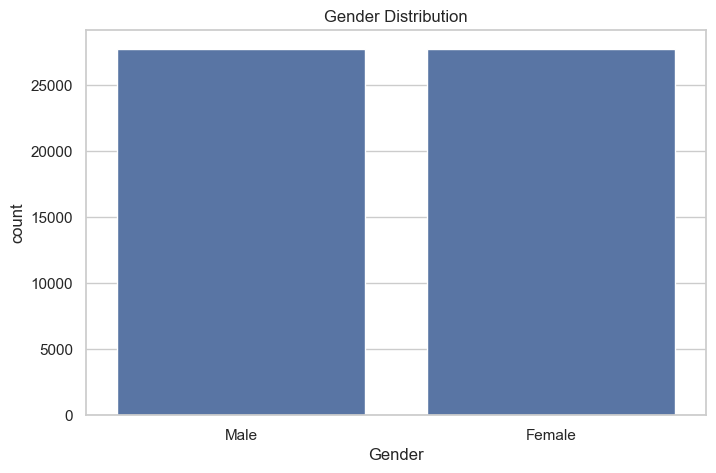

In [12]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

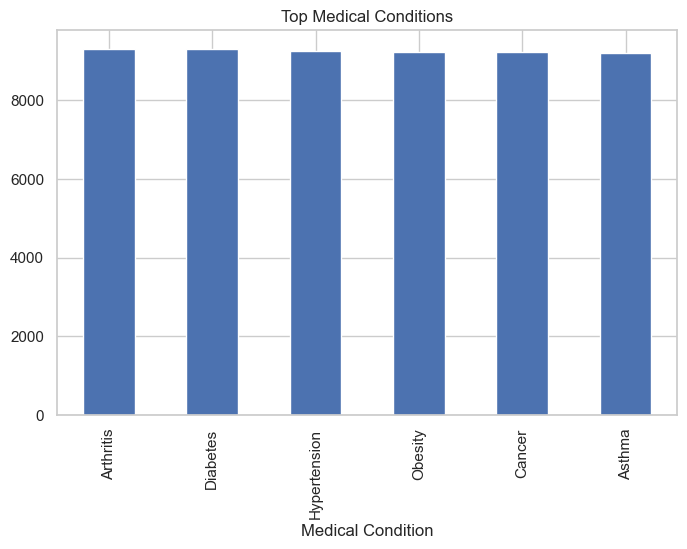

In [13]:
df['Medical Condition'].value_counts().head(10).plot(kind='bar')
plt.title("Top Medical Conditions")
plt.show()

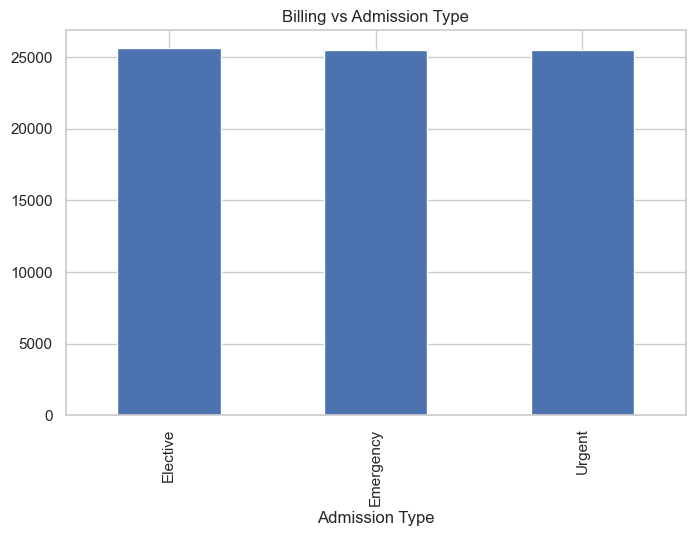

In [14]:
df.groupby('Admission Type')['Billing Amount'].mean().plot(kind='bar')
plt.title("Billing vs Admission Type")
plt.show()

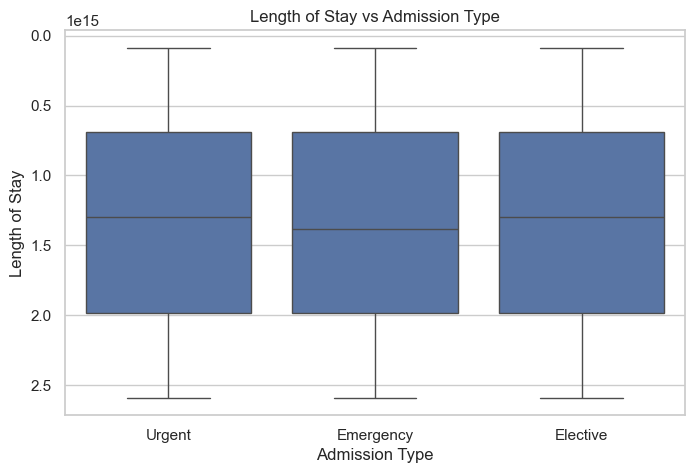

In [15]:
sns.boxplot(x='Admission Type', y='Length of Stay', data=df)
plt.title("Length of Stay vs Admission Type")
plt.show()

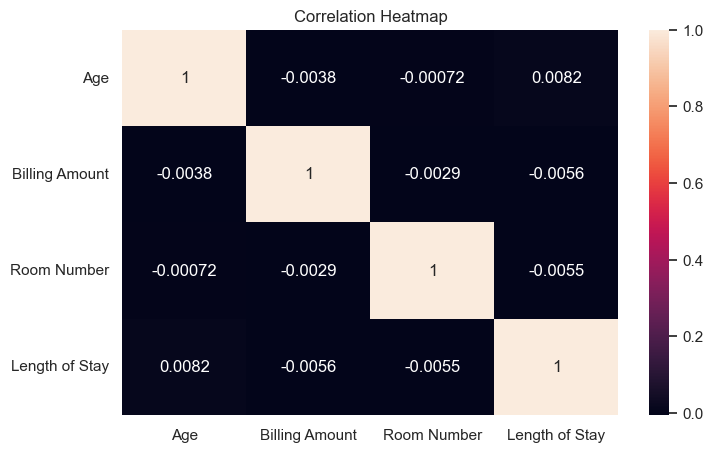

In [16]:
numeric_df = df.select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
drop_cols = ['Name','Doctor','Hospital',
             'Date of Admission','Discharge Date',
             'Room Number']

df_model = df.drop(drop_cols, axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Name                55500 non-null  object         
 1   Age                 55500 non-null  int64          
 2   Gender              55500 non-null  object         
 3   Blood Type          55500 non-null  object         
 4   Medical Condition   55500 non-null  object         
 5   Date of Admission   55500 non-null  datetime64[ns] 
 6   Doctor              55500 non-null  object         
 7   Hospital            55500 non-null  object         
 8   Insurance Provider  55500 non-null  object         
 9   Billing Amount      55500 non-null  float64        
 10  Room Number         55500 non-null  int64          
 11  Admission Type      55500 non-null  object         
 12  Discharge Date      55500 non-null  datetime64[ns] 
 13  Medication          55500 non-n

In [19]:
# Convert all timedelta columns to integer days
for col in df.select_dtypes(include=['timedelta64']):
    df[col] = df[col].dt.days

In [20]:
for col in df.select_dtypes(include=['datetime64']):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day

# Drop original datetime columns
df.drop(columns=df.select_dtypes(include=['datetime64']).columns, inplace=True)

In [21]:
# Convert all timedelta columns to integer days
for col in df.select_dtypes(include=['timedelta64']):
    df[col] = df[col].dt.total_seconds() / (24*3600)  # Convert to days as float

In [23]:
le_dict = {}
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns

In [24]:
le_dict = {}

categorical_cols = df_model.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    le_dict[col] = le

In [31]:
le_dict = {}

categorical_cols = df_model.select_dtypes(include='category').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    le_dict[col] = le

In [32]:
X = df_model.drop('Admission Type', axis=1)
y = df_model['Admission Type']

In [42]:
for col in X.select_dtypes(include="object").columns:
    X[col] = X[col].astype("category").cat.codes

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [34]:
X_train['Length of Stay'] = X_train['Length of Stay'].dt.days
X_test['Length of Stay'] = X_test['Length of Stay'].dt.days

In [35]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.42945945945945946


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.46      0.44      3664
           1       0.43      0.42      0.42      3656
           2       0.43      0.41      0.42      3780

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100



In [38]:
joblib.dump(model, "healthcare_model.pkl")
joblib.dump(le_dict, "encoders.pkl")

print("Model & Encoders saved successfully!")

Model & Encoders saved successfully!
